**Author**: Victor Teixidó López

In [1]:
!pip install -q langdetect
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

from matplotlib.pyplot import plot

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

from datetime import datetime

from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 100

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# REVIEWS OF THEME PARKS

We are going to use 2 different datasets. Overall we will be working with nearly 100,000 reviews.

The [first dataset](https://www.kaggle.com/datasets/arushchillar/disneyland-reviews) collects the opinions and ratings given to 3 Disneyland branches.
- Disneyland California
- Disneyland Hong Kong
- Disneyland Paris

The [second dataset](https://www.kaggle.com/datasets/dwiknrd/reviewuniversalstudio) includes the reviews and ratings given to 3 Universal Studio branches.
- Universal Florida
- Universal Singapore
- Universal Japan

# Disneyland branches

In [3]:
disneyland_data = pd.read_csv("/content/drive/MyDrive/UNI/tfg/DisneylandReviews.csv", encoding="windows-1252")
disneyland_data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


The id and location of the reviewer will not provide any useful information. In the same way, knowing when the review was written it doesn't provide any useful information either. For these reasons, we will drop *Review_ID*, *Reviewer_Location*, *Year_Month* columns from the dataset.

In [4]:
disneyland_data.drop(columns=['Review_ID','Reviewer_Location','Year_Month'], inplace=True)
disneyland_data.rename({'Rating': 'ratings', 'Review_Text': 'reviews', 'Branch': 'theme_park'},
                       axis=1, inplace=True)

In [5]:
disneyland_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ratings,42656.0,NaN,NaN,NaN,4.217695,1.063371,1.0,4.0,5.0,5.0,5.0
reviews,42656,42632,Disneyland we love it! The service is incomp...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
theme_park,42656,3,Disneyland_California,19406,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Universal Studio branches

In [6]:
universal_data = pd.read_csv("/content/drive/MyDrive/UNI/tfg/UniversalStudioReviews.csv", encoding="utf-8")
universal_data.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


The name of the reviewer is irrelevant for our data analysis. We will also obviate the title of each of the ratings. Same as before, the date of the review is not important either. For these reasons, we will drop the variables *reviewer*, *title*, *written_date* columns from the Universal Studio dataset.

In [7]:
universal_data.drop(columns=['reviewer','title','written_date'], inplace=True)
universal_data.rename({'rating': 'ratings', 'review_text': 'reviews', 'branch': 'theme_park'},
                       axis=1, inplace=True)

In [8]:
universal_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ratings,50904.0,NaN,NaN,NaN,4.256994,1.046716,1.0,4.0,5.0,5.0,5.0
reviews,50904,50847,This was our second visit this time we a had t...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
theme_park,50904,3,Universal Studios Florida,30621,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Combine both datasets

We concatenate both datasets into a single one. Now we have more than 90,000 ratings and reviews from 6 different theme parks.

In [9]:
df = pd.concat([disneyland_data, universal_data], ignore_index=True)

Let's see the frecuency of ratings and reviews that we have of each theme park in our combined dataset.

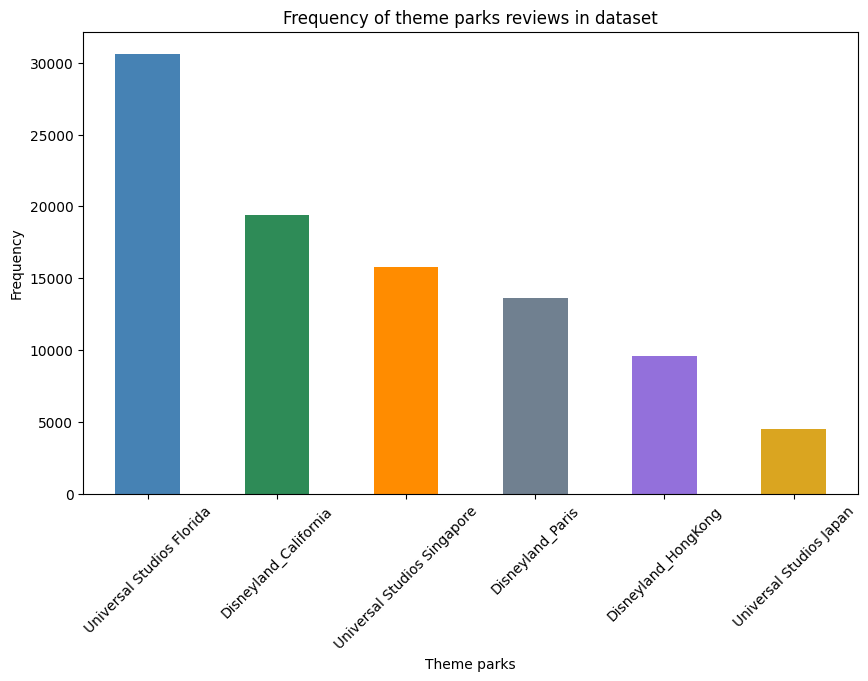

In [10]:
theme_park_counts = df['theme_park'].value_counts()

plt.figure(figsize=(10, 6))
theme_park_counts.plot(kind='bar', color=['steelblue','seagreen','darkorange','slategray','mediumpurple','goldenrod'])
plt.title("Frequency of theme parks reviews in dataset")
plt.xlabel("Theme parks")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

We will drop the variable that defines the name of the park from our data. When analyzing and extracting conclusions, this information will not be relevant.

In [11]:
df.drop(columns=['theme_park'], inplace=True)
df.head()

,ratings,reviews
0,4.0,If you've ever been to Disneyland anywhere you...
1,4.0,Its been a while since d last time we visit HK...
2,4.0,Thanks God it wasn t too hot or too humid wh...
3,4.0,HK Disneyland is a great compact park. Unfortu...
4,4.0,"the location is not in the city, took around 1..."


# Dataset preprocessing

First step will be cleaning the dataset and making some adjustments to it.

In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ratings,93560.0,NaN,NaN,NaN,4.239077,1.054518,1.0,4.0,5.0,5.0,5.0
reviews,93560,93479,These parks are great. But I advise you to arr...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Rating

This class, despite being defined by numbers, is a categorical class. Although, we want to preserve the relation between the different ratings that can be given (1 to 5).

In [13]:
df['ratings'] = pd.Categorical(df['ratings'], categories=[1,2,3,4,5], ordered=True)

In [14]:
df['ratings'].value_counts()

5    51348
4    24289
3    10338
2     4113
1     3472
Name: ratings, dtype: int64

## Review

### All reviews in english

First step will be checking and guarantee that all reviews are in english or not.

To do so, we will try to encode the text and decode it as *ascii*. Doing this we will discard reviews in languages that contains "not common" symbols. This will lead to few false negative cases that we will have to treat later, for example, the *'* character is not included in the *ascii* but it's used in english.

In [15]:
def isEnglish(s):
    try:
        s.encode(encoding="utf-8").decode("ascii")
    except UnicodeDecodeError:
        return False
    else:
        return True

After the first filter we will use the *detect* method from the *langdetect* library to check if the review it's really not written in english.

We will use this method only to make sure we are not discarding any english review. Applying this function to all the ratings in the dataset
 would have a prohibitively expensive temporary cost that's why we only use it as a double-check.

In [16]:
c = 0
review_index = df['reviews'].index # (start, stop, step)
rows_to_delete = []

for i in range(review_index.start, review_index.stop):
    s = df['reviews'][i]
    if not isEnglish(s) and detect(s) != "en":
          c += 1
          rows_to_delete.append(i)

print("Not in english reviews:", c)

Not in english reviews: 18


Let's see and example of a not in english review that will be deleted from the dataframe.

In [17]:
idx = rows_to_delete[10]
df['reviews'][idx]

'Universal studios Singapore ลงที่ MRT HarbourFront (CC29/NE1) ที่ห้าง Vivo City แล้วต่อรถไฟเข้าไปอีกประมาณ 4 $ ในตัวเกาะ ( Sentosa Express) หรือจะเดินไปก็ได้ ราคาตั๋วค่าเข้า Universal Studios Singaporeที่เราซื้อ ประมาณ 72$ แบบ one day pass สามารถเล่นได้ทุกเครื่องเล่นภายในหนึ่งวัน สามารถซื้อผ่าน web ซื้อมาก่อนจะได้ไม่เสียเวลาคร้า ราคาค่าตั๋วมี 2 ช่วงคือ • วันธรรมดา (Weekday) ผู้ใหญ่ 66SGD และ เด็ก 48SGD • ช่วงวันหยุด (Peak Day) ผู้ใหญ่ 72SGD และ เด็ก 52SGD การเที่ยวภายใน USS เราจะเดินเป็นวงกลม ผ่านทั้งหมด 7 โซน ตามแผนที่ด้านล่าง โดยจะเริ่มตั้งแต่ โซน Hollywood -> New York -> Sci Fi City -> Ancient Egypt -> Lost World -> Far Far Away -> Madagascar เที่ยวให้ครบ เล่นให้หมด โซนสำคัญๆ อย่าพลาดๆมาแล้วทั้งที โซน Sci Fi City คือ Transformers the Ride : The Ultimate 3D Battle เหมือนกับเราไปอยู่ในตัวหุ่นยนต์เลย แล้วต่อสู้กะหุ่นยนต์ตัวอื่นๆ เป็นการทำภาพสามมิติ effect ดูเหมือนจริงทีเดียว ต่อมา โซน Ancient Egypt ย้อนเข้าสู่ยุคมั่มมี่ เข้าสุสานฟาร์โร ตื่นเต้นเช่นกานเครื่องเล่นนี้ เสียวนิดหน่อย พอดีค

Due to only being 18 reviews that are not in english, we've decided to delete those from the dataframe.

In [18]:
df.drop(rows_to_delete, inplace=True)

df.describe(include="all").T

,count,unique,top,freq
ratings,93542,5,5,51333
reviews,93542,93461,Having never been to any Disneyland I was thri...,2


### Normalize text

Next step consists in normalizing all the reviews with the same format.

First we convert them to lower case.

In [19]:
df['reviews'] = df['reviews'].apply(lambda x: x.lower())

In [20]:
df['reviews'][1]

"its been a while since d last time we visit hk disneyland .. yet, this time we only stay in tomorrowland .. aka marvel land!now they have iron man experience n d newly open ant man n d wasp!!ironman .. great feature n so exciting, especially d whole scenery of hk (hk central area to kowloon)!antman .. changed by previous buzz lightyear! more or less d same, but i'm expecting to have something most!!however, my boys like it!!space mountain .. turns into star wars!! this 1 is great!!!for cast members (staffs) .. felt bit minus point from before!!! just dun feel like its a disney brand!! seems more local like ocean park or even worst!!they got no smiling face, but just wanna u to enter n attraction n leave!!hello this is supposed to be happiest place on earth brand!! but, just really dont feel it!!bakery in main street now have more attractive delicacies n disney theme sweets .. these are good points!!last, they also have starbucks now inside the theme park!!"

### Remove unicode characters

Next, we delete characters such as slashes, ats...

In [21]:
import re

def remove_unicode_characters(text):
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", text)

  return text

df['reviews'] = df['reviews'].apply(remove_unicode_characters)

In [22]:
df['reviews'][1]

'its been a while since d last time we visit hk disneyland    yet  this time we only stay in tomorrowland    aka marvel land now they have iron man experience n d newly open ant man n d wasp  ironman    great feature n so exciting  especially d whole scenery of hk  hk central area to kowloon  antman    changed by previous buzz lightyear  more or less d same  but i m expecting to have something most  however  my boys like it  space mountain    turns into star wars   this 1 is great   for cast members  staffs     felt bit minus point from before    just dun feel like its a disney brand   seems more local like ocean park or even worst  they got no smiling face  but just wanna u to enter n attraction n leave  hello this is supposed to be happiest place on earth brand   but  just really dont feel it  bakery in main street now have more attractive delicacies n disney theme sweets    these are good points  last  they also have starbucks now inside the theme park  '

### Stopwords removal

Eliminate common words (e.g., "the," "and") that may not carry significant meaning.

In [23]:
stop = stopwords.words('english')

def remove_stopwords(text):
  text = " ".join([word for word in text.split() if word not in (stop)])

  return text

df['reviews'] = df['reviews'].apply(remove_stopwords)

In [24]:
df['reviews'][1]

'since last time visit hk disneyland yet time stay tomorrowland aka marvel land iron man experience n newly open ant man n wasp ironman great feature n exciting especially whole scenery hk hk central area kowloon antman changed previous buzz lightyear less expecting something however boys like space mountain turns star wars 1 great cast members staffs felt bit minus point dun feel like disney brand seems local like ocean park even worst got smiling face wanna u enter n attraction n leave hello supposed happiest place earth brand really dont feel bakery main street attractive delicacies n disney theme sweets good points last also starbucks inside theme park'

### Stemming and Lemmatization

[...]


## Tokenization

After having all reviews normalized, we continue with their tokenization by words. The output will be an array of words that can be used to train our future models.

In [25]:
from transformers import AutoTokenizer

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [26]:
tokens = tokenizer.tokenize(df['reviews'][0])
print(tokens)
input_ids = tokenizer.convert_tokens_to_ids(tokens)
print(input_ids)
final_inputs = tokenizer.prepare_for_model(input_ids)
print(final_inputs['input_ids'])

print(tokenizer.decode(final_inputs['input_ids']))

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


['ever', 'disneyland', 'anywhere', 'find', 'disneyland', 'hong', 'kong', 'similar', 'layout', 'walk', 'main', 'street', 'familiar', 'feel', 'one', 'rides', 'small', 'world', 'absolutely', 'fabulous', 'worth', 'day', 'visited', 'fairly', 'hot', 'relatively', 'busy', 'queue', '##s', 'moved', 'fairly', 'well']
[2412, 25104, 5973, 2424, 25104, 4291, 4290, 2714, 9621, 3328, 2364, 2395, 5220, 2514, 2028, 12271, 2235, 2088, 7078, 18783, 4276, 2154, 4716, 7199, 2980, 4659, 5697, 24240, 2015, 2333, 7199, 2092]
[101, 2412, 25104, 5973, 2424, 25104, 4291, 4290, 2714, 9621, 3328, 2364, 2395, 5220, 2514, 2028, 12271, 2235, 2088, 7078, 18783, 4276, 2154, 4716, 7199, 2980, 4659, 5697, 24240, 2015, 2333, 7199, 2092, 102]
[CLS] ever disneyland anywhere find disneyland hong kong similar layout walk main street familiar feel one rides small world absolutely fabulous worth day visited fairly hot relatively busy queues moved fairly well [SEP]


In [27]:
tokenized_reviews = tokenizer(df['reviews'].astype(str).tolist(), padding=True, truncation=True, return_tensors="pt", max_length=512)

In [28]:
tokenized_reviews

{'input_ids': tensor([[  101,  2412, 25104,  ...,     0,     0,     0],
        [  101,  2144,  2197,  ...,     0,     0,     0],
        [  101,  4283,  2643,  ...,     0,     0,     0],
        ...,
        [  101,  4716,  2034,  ...,     0,     0,     0],
        [  101,  4716,  3822,  ...,     0,     0,     0],
        [  101,  2177,  3266,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}